In [1]:
%matplotlib widget
import serial,socket,os,glob
import matplotlib.pyplot as plt
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
from serial import Serial

In [2]:
if socket.gethostname() == 'juan-X515EA':
    port = '/dev/ttyUSB0'
elif     socket.gethostname() == 'juan-i7':
    port = '/dev/ttyUSB0'
    global running


arduino = Serial(port, 115200)
#trash = arduino.readlines(10)
linea = arduino.readline()
arduino.close()
running = True

In [3]:
def lee_arduino(arduino):
    linea = arduino.readline()

    return linea

In [44]:
fileout = 'referencia_200grf'
arduino = serial.Serial(port, 115200)

original_stdout = sys.stdout # Save a reference to the original standard output

out1 = lee_arduino(arduino)
with open(fileout, 'w') as archivo:
    for i in range(500):
        
        sys.stdout = archivo # Change the standard output to the file we created.
        time.sleep(0.001)
        out1 = lee_arduino(arduino)
        texto = str(out1.decode('ascii')).strip().split('\r')[0]
        print(texto)
        sys.stdout = original_stdout # Reset the standard output to its original value

arduino.close()
archivo.close()
A = pd.read_csv(fileout,names = ['t','D','L','r'])

In [45]:

A.iloc[:,3].mean()

-4952.918

In [70]:
B = pd.read_csv('calibra_balanza_02.csv',header=None)

In [71]:
x0,y0 =B.to_numpy().T
p1 = np.polyfit(x0,y0,1)
px = np.poly1d(p1)
x = np.linspace(0,x0.max(),100)


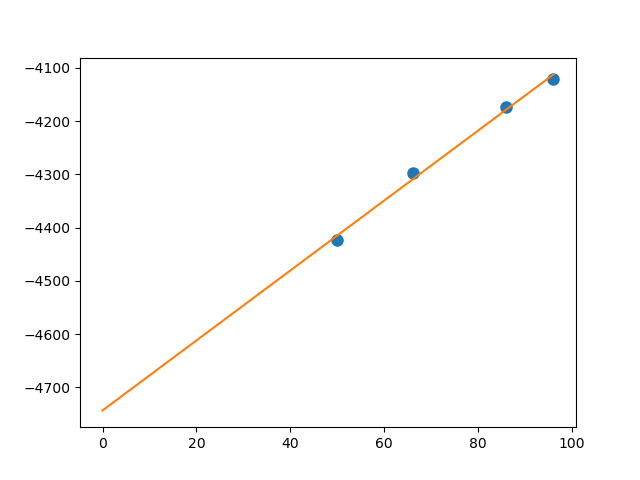

In [72]:
fig,ax = plt.subplots()
ax.plot(B.iloc[:,0],B.iloc[:,1],'o',markersize=8)
ax.plot(x,px(x))

In [75]:
96*6.57

630.72

In [76]:
p1[0]

6.572217837411194

In [80]:
(y0[-1]-y0[0])/(x0[-1]-x0[0])

6.586956521739131

In [83]:
rho = 1.2
L = 350e-3
D= 50e-3
Cd = 1

In [91]:
Fd = 100*1e-4
U = (Fd/(L*D*Cd*rho/2))**.5

In [92]:
U

0.9759000729485333